In [1]:
#importing important libraries
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler 
import matplotlib 
import matplotlib.pyplot as plt
import logging

logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog-ARIMA.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)


C:\Users\hug0er\Anaconda3\envs\Tesis\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hug0er\Anaconda3\envs\Tesis\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
class TimeSeriesNN3():
    def __init__(self,STEPS_AHEAD ,NUMBER_TESTING , SERIE, WINDOW):
        self.STEPS_AHEAD = STEPS_AHEAD
        self.WINDOW = WINDOW
        self.NUMBER_TESTING = NUMBER_TESTING
        self.SERIE = SERIE
        self.SIZE = SERIE.shape[0]
        self.NUMBER_TRAINING = self.SIZE - self.NUMBER_TESTING
    
    def divide_testing (self):
        return (self.SERIE[:self.NUMBER_TRAINING],self.SERIE[self.NUMBER_TRAINING:])
    
    def divide_validation (self,serie):
        experimentx = np.zeros((len(serie) - self.WINDOW -self.STEPS_AHEAD + 1, self.WINDOW))
        experimenty = np.zeros((len(serie) - self.WINDOW -self.STEPS_AHEAD + 1,1))
        cnt =  0
        cnt2 = 0
        #serie = serie.reset_index(drop = True)
        for i in range (experimentx.shape[0]):
            cnt += cnt2
            for j in range (self.WINDOW):
                experimentx[i][j] = serie[cnt]
                cnt += 1   
            experimenty[i] = serie[cnt + self.STEPS_AHEAD - 1]
            cnt = 0
            cnt2 += 1           
        return (experimentx, experimenty)
    
    def batch (self):
        training,testing = self.divide_testing()
        tex,tey = self.divide_validation(testing)
        tx,ty = self.divide_validation(training)        
        return (tx,ty) , (tex,tey)
training_data = pd.read_excel("NN3_FINAL_DATASET_WITH_TEST_DATA.xlsx",sheet_name="Hoja 1")
training_data
Serie_1 = training_data.iloc[:, 12:13].values
Serie_1
scaler = MinMaxScaler(feature_range = (0, 1))
Serie_1 = scaler.fit_transform(Serie_1)  
print(Serie_1)
serie1 = TimeSeriesNN3(1,14,Serie_1,100)
x_train, x_test= serie1.divide_testing()
#predicting values and evaluating model



[[0.        ]
 [0.00699301]
 [0.01398601]
 [0.02097902]
 [0.02797203]
 [0.03496503]
 [0.04195804]
 [0.04895105]
 [0.05594406]
 [0.06293706]
 [0.06993007]
 [0.07692308]
 [0.08391608]
 [0.09090909]
 [0.0979021 ]
 [0.1048951 ]
 [0.11188811]
 [0.11888112]
 [0.12587413]
 [0.13286713]
 [0.13986014]
 [0.14685315]
 [0.15384615]
 [0.16083916]
 [0.16783217]
 [0.17482517]
 [0.18181818]
 [0.18881119]
 [0.1958042 ]
 [0.2027972 ]
 [0.20979021]
 [0.21678322]
 [0.22377622]
 [0.23076923]
 [0.23776224]
 [0.24475524]
 [0.25174825]
 [0.25874126]
 [0.26573427]
 [0.27272727]
 [0.27972028]
 [0.28671329]
 [0.29370629]
 [0.3006993 ]
 [0.30769231]
 [0.31468531]
 [0.32167832]
 [0.32867133]
 [0.33566434]
 [0.34265734]
 [0.34965035]
 [0.35664336]
 [0.36363636]
 [0.37062937]
 [0.37762238]
 [0.38461538]
 [0.39160839]
 [0.3986014 ]
 [0.40559441]
 [0.41258741]
 [0.41958042]
 [0.42657343]
 [0.43356643]
 [0.44055944]
 [0.44755245]
 [0.45454545]
 [0.46153846]
 [0.46853147]
 [0.47552448]
 [0.48251748]
 [0.48951049]
 [0.49

In [16]:
#divide into train and validation set
train = x_train
test = x_test
print(train.shape)
print(test.shape)

(130, 1)
(14, 1)


In [17]:
#training model
logging.info('entrada')
model = auto_arima(train, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=False,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
#fitting model


model.fit(train)
y_pred = model.predict(n_periods=len(test))
y_pred = y_pred.reshape(len(test),1)
from sklearn.metrics import mean_squared_error
acc =  mean_squared_error(test, y_pred)
print(np.hstack((test , y_pred)))
print(acc)
logging.info('salida')

Fit ARIMA: order=(0, 1, 0); AIC=-9461.314, BIC=-9455.595, Fit time=0.009 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-9468.022, BIC=-9459.443, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 2); AIC=-9477.478, BIC=-9466.039, Fit time=0.047 seconds
Fit ARIMA: order=(0, 1, 3); AIC=-9475.331, BIC=-9461.032, Fit time=0.089 seconds
Fit ARIMA: order=(0, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 6); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 8); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 9); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 10); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0); AIC=-9465.354, BIC=-9456.775, Fit time=0.035 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-9480.530, BIC=-9469.091, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-9478.273, B

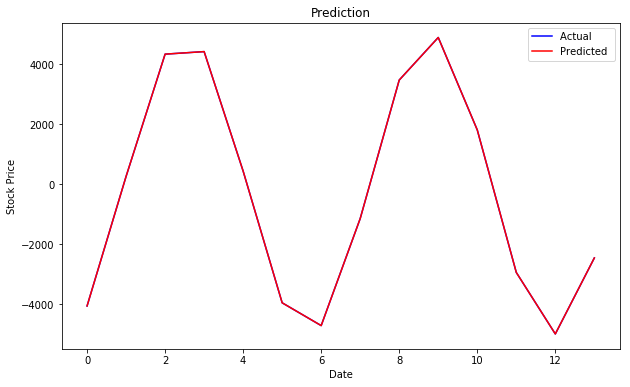

In [13]:
predictions = model.predict(n_periods=len(test))  
predictions = predictions.reshape(-1,1)
predictions = scaler.inverse_transform(predictions) 
labelsf = scaler.inverse_transform(test) 
plt.figure(figsize=(10,6))  
plt.plot(labelsf, color='blue', label='Actual ')  
plt.plot(predictions , color='red', label='Predicted ')  
plt.title('Prediction')  
plt.xlabel('Date')  
plt.ylabel('Stock Price')  
plt.legend()  
plt.show()  